In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [256]:
df = pd.read_csv('../../decision_trees/CreditScoring.csv')

df.columns = df.columns.str.lower()

In [257]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [258]:
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        353
assets        160
debt          183
amount        285
price        1419
dtype: int64

In [259]:
# let's convert categorical with numerical value
# to string (object in pandas)
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [260]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [261]:
df.describe().round()
# strange big values in 'income'/'assets'/'debt'

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [262]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999, value=0)

In [263]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,130.0,5346.0,342.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,87.0,11525.0,1244.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,119.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,164.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [264]:
df = df[df.status != 'unk'].reset_index(drop=True)
# as we don't want unkown status in our dataframe

In [265]:
# And check whether we remove them
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [266]:
# default variable creation
df['default'] = (df.status == 'default').astype(int)

In [267]:
# remove target variable from dataset
del df['status']

# Preparation

In [268]:
df.nunique()

seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
default         2
dtype: int64

In [269]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int64
dtype: object

In [270]:
# numerical
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price',
 'default']

In [271]:
# categorical
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['home', 'marital', 'records', 'job']

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=1)

In [274]:
y_full_train = full_train.default.values
y_test = df_test.default.values
y_train = df_train.default.values
y_valid = df_valid.default.values

# Q1

In [275]:
from sklearn.metrics import roc_auc_score

In [278]:
def calc_feature_importance(curr_df, features):
    result = {}
    
    for f in features:
        if f == 'default':
            continue
        
        metric = roc_auc_score(curr_df['default'], curr_df[f])
        if metric < 0.5:
            metric = roc_auc_score(curr_df['default'], -curr_df[f])
        
        result[f] = metric
    
    return result

In [279]:
calc_feature_importance(df_train, numerical)

{'seniority': 0.7093778624491943,
 'time': 0.5608662489595051,
 'age': 0.5732933272499939,
 'expenses': 0.5009184217217011,
 'income': 0.682006666132633,
 'assets': 0.6486042567122802,
 'debt': 0.5047829675783548,
 'amount': 0.5910773431595518,
 'price': 0.5043329862114843}

In [280]:
df[['seniority', 'default']].corr()

,seniority,default
seniority,1.000000,-0.260393
default,-0.260393,1.000000


In [281]:
# del full_train['default']
# don't remove it here as we'll need it in Kfold
del df_test['default']
del df_valid['default']
del df_train['default']

In [282]:
features = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [284]:
dv = DictVectorizer(sparse=False)

In [285]:
dict_train = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

In [286]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [287]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Q2

In [288]:
dict_valid = df_valid[features].to_dict(orient='records')
X_valid = dv.transform(dict_valid)

In [289]:
soft_predictions = model.predict_proba(X_valid)[:, 1]

In [290]:
thresholds = np.linspace(0, 1, 21)

In [291]:
results = []

for t in thresholds:
    default_result = (soft_predictions >= t)
    result = (default_result == y_valid).mean()
    results.append(result)

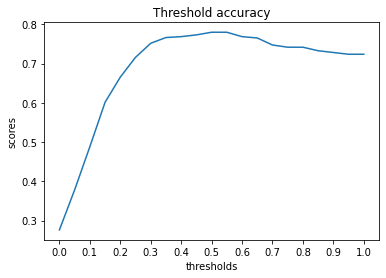

In [292]:
plt.plot(thresholds, results)
plt.title('Threshold accuracy')
plt.xlabel('thresholds')
plt.ylabel('scores')
plt.xticks(np.linspace(0, 1, 11))

plt.show()

In [293]:
from sklearn.metrics import accuracy_score

In [294]:
accuracy_score(y_valid, soft_predictions >= 0.5)

0.7800224466891134

In [295]:
from sklearn.metrics import roc_auc_score

In [296]:
roc_auc_score(y_valid, soft_predictions)

0.8120879813449298

# Q3

<h3>Confusion table</h3>

In [297]:
real_positive = y_valid == 1
real_negative = y_valid == 0

In [298]:
# use 0.5 as it's the best threshold
predicted_positive = soft_predictions >= 0.5
predicted_negative = soft_predictions < 0.5

In [299]:
tp = (real_positive & predicted_positive).sum()
tn = (real_negative & predicted_negative).sum()
fp = (real_negative & predicted_positive).sum()
fn = (real_positive & predicted_negative).sum()

In [300]:
c_t = np.array([
    [tn, fp],
    [fn, tp]
])

In [301]:
c_t

array([[581,  64],
       [132, 114]])

In [302]:
def model_evaluation(y_valid, soft_predictions):
    thresholds = np.arange(0, 0.9, 0.01)
    scores = []
    
    for t in thresholds:
        predicted_positive = soft_predictions >= t
        predicted_negative = soft_predictions < t
        
        real_positive = (y_valid == 1)
        real_negative = (y_valid == 0)
        
        tp = (real_positive & predicted_positive).sum()
        tn = (real_negative & predicted_negative).sum()
        fp = (real_negative & predicted_positive).sum()
        fn = (real_positive & predicted_negative).sum()
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        # scores.append((t, tp, tn, fp, fn))
        scores.append((t, precision, recall))
    
    return scores

In [303]:
results = model_evaluation(y_valid, soft_predictions)

In [304]:
cols = ['threshold', 'precision', 'recall']
df_small = pd.DataFrame(results, columns=cols)

In [305]:
df_small[::10]

,threshold,precision,recall
0,0.0,0.276094,1.000000
10,0.1,0.345588,0.955285
20,0.2,0.446058,0.873984
30,0.3,0.535817,0.760163
40,0.4,0.583333,0.569106
50,0.5,0.640449,0.463415
60,0.6,0.672414,0.317073
70,0.7,0.698113,0.150407
80,0.8,0.807692,0.085366


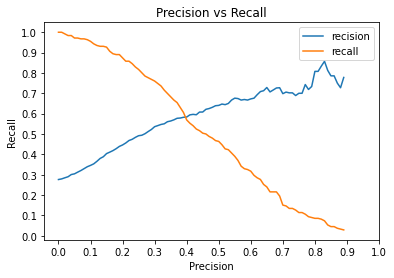

In [306]:
plt.plot(df_small.threshold, df_small.precision, label='recision')
plt.plot(df_small.threshold, df_small.recall, label='recall')

plt.title('Precision vs Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.legend()
plt.show()

# Q4

In [344]:
from sklearn.metrics import f1_score

thresholds = np.arange(0, 0.9, 0.01)
result = {'threshold': float('-inf'), 'f1': float('-inf')}

for t in thresholds:
    score = f1_score(y_valid, soft_predictions >= t)
    if score > result['f1']:
        result['threshold'] = t
        result['f1'] = score

In [345]:
result

{'threshold': 0.3, 'f1': 0.6285714285714286}

In [346]:
def f1_score_calc(y_valid, soft_predictions):
    thresholds = np.arange(0, 0.9, 0.01)
    scores = {}
    
    for t in thresholds:
        predicted_positive = soft_predictions >= t
        predicted_negative = soft_predictions < t
        
        real_positive = (y_valid == 1)
        real_negative = (y_valid == 0)
        
        tp = (real_positive & predicted_positive).sum()
        tn = (real_negative & predicted_negative).sum()
        fp = (real_negative & predicted_positive).sum()
        fn = (real_positive & predicted_negative).sum()
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall / (precision + recall))
        
        scores[t] = f1
    
    return scores

In [347]:
f1_results = f1_score_calc(y_valid, soft_predictions)

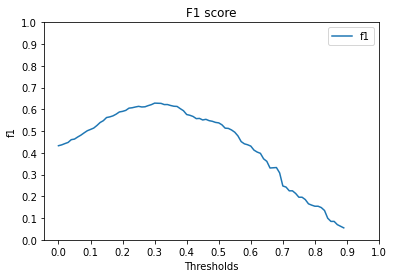

In [348]:
plt.plot(list(f1_results.keys()), list(f1_results.values()), label='f1')
plt.title('F1 score')
plt.xlabel('Thresholds')
plt.ylabel('f1')

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.legend()
plt.show()

In [349]:
max(f1_results, key=f1_results.get)

0.3

# Q5

In [350]:
from sklearn.model_selection import KFold

In [351]:
def train(df, y, features):
    dv = DictVectorizer(sparse=False)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    
    frame_dict = df[features].to_dict(orient='records')
    X = dv.fit_transform(frame_dict)
    
    model.fit(X, y)
    
    return model, dv

In [352]:
def predict_result(df, y, features, dv, model):
    df_dict = df[features].to_dict(orient='records')
    X = dv.transform(df_dict)
    
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [353]:
model, dv = train(df_train, y_train, features)

In [354]:
prediction = predict_result(df_valid, y_valid, features, dv, model)

In [355]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [356]:
# use `features` to discern desired
# columns and also keep away `default`

def kFold_calc(kfold, full_train, features):
    scores = []

    for trainIdx, validIdx in kfold.split(full_train):
        df_valid = full_train.iloc[validIdx]
        df_train = full_train.iloc[trainIdx]
        
        y_valid = df_valid.default.values
        y_train = df_train.default.values
        
        model, dv = train(df_train, y_train, features)
        
        soft_prediction = predict_result(df_valid, y_valid, features, dv, model)
        
        auc = roc_auc_score(y_valid, soft_prediction)
        scores.append(auc)
    
    return scores

In [357]:
fold_results = kFold_calc(kfold, full_train, features)

In [358]:
np.std(fold_results)

0.01460989648482707

# Q6

In [359]:
def train_reg(df, y, features, C=False):
    dv = DictVectorizer(sparse=False)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
    frame_dict = df[features].to_dict(orient='records')
    X = dv.fit_transform(frame_dict)
    
    model.fit(X, y)
    
    return model, dv

In [360]:
def kFold_reg(kfold, full_train, features):
    reg_levels = [0.01, 0.1, 1, 10]
    
    scores = {r: [] for r in reg_levels}
    
    for r in reg_levels:
        
        for trainIdx, validIdx in kfold.split(full_train):
            df_valid = full_train.iloc[validIdx]
            df_train = full_train.iloc[trainIdx]

            y_valid = df_valid.default.values
            y_train = df_train.default.values

            model, dv = train_reg(df_train, y_train, features, C=r)

            soft_prediction = predict_result(df_valid, y_valid, features, dv, model)

            auc = roc_auc_score(y_valid, soft_prediction)
            scores[r].append(auc)
    
    return scores

In [361]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [362]:
data = kFold_reg(kfold, full_train, features)

In [364]:
for key, value in data.items():
    mean_data = round(np.mean(value), 3)
    std_data = round(np.std(value), 3)
    print(f"reg: {key}, mean: {mean_data}, std: {std_data}")

reg: 0.01, mean: 0.808, std: 0.012
reg: 0.1, mean: 0.813, std: 0.014
reg: 1, mean: 0.814, std: 0.015
reg: 10, mean: 0.814, std: 0.015
